# Background - Analyzing IMDB Data in Keras
This project uses a dataset of 25,000 IMDB reviews. Each review comes with a label- a label of 0 is given to a negative review, and a label of 1 is given to a positive review. The goal of this project is to create a model that will predict the sentiment of a review, based on the words in it. You can see more information about this dataset on the Keras (https://keras.io/datasets/) website.

In [93]:
# Imports
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

np.random.seed(42)

In [94]:
print('Keras version: {}'.format(keras.__version__))
print('Tensorflow version: {}'.format(tf.__version__))

Keras version: 2.1.5
Tensorflow version: 1.6.0


## Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000.

In [95]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector. 

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [96]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [97]:
print('Number of positive reviews: {}'.format(sum(y_train == 1)))

Number of positive reviews: 12500


##  One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1. See projects in NLP repository on how to create these corpus of words.

In [98]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0][:100])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0.]


In [17]:
x_train.shape

(25000, 1000)

And we'll also one-hot encode the output.

In [18]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## Building the  model architecture
Next we'll build out first model using Keras' Sequential method. We'll build a 4 layer neural network with 3 hidden layers and make use of the relu activation function between hidden layers. We'll also make use of dropout to reduce overfitting. We'll use the accuracy metric to evaluate our model. Since we're not dealing with a rare event, the accuracy measure will suffice. 

In [60]:
# Build the model architecture

def baseline_model():
    
    model = Sequential()
    model.add(Dense(128,activation='relu',input_shape=(1000,)))
    model.add(Dropout(.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(.1))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(.1))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

model1 = baseline_model()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               128128    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 66        
Total para

## Training the model
Now it's time to train our model. 

In [61]:
hist_1 = model1.fit(x_train,y_train,epochs=250, batch_size=5000, verbose=0,validation_split=0.2)

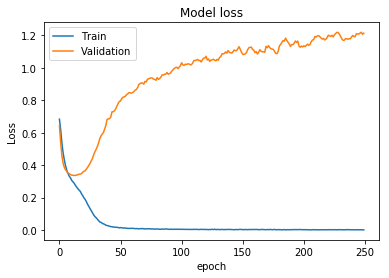

In [62]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

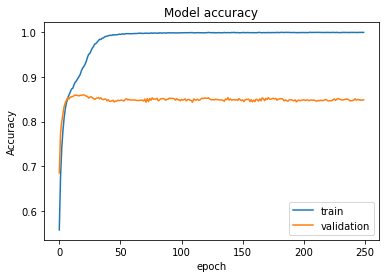

In [75]:
plt.plot(hist_1.history['acc'])
plt.plot(hist_1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

From the above graph it can be seen that the model is starting to overfit quite early on. Let's increase the dropout to 0.5

In [68]:
def higher_dropout_model():
    
    model = Sequential()
    model.add(Dense(128,activation='relu',input_shape=(1000,)))
    model.add(Dropout(.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

model2 = higher_dropout_model()

In [69]:
hist_2 = model2.fit(x_train,y_train,epochs=250, batch_size=5000, verbose=0,validation_split=0.2)

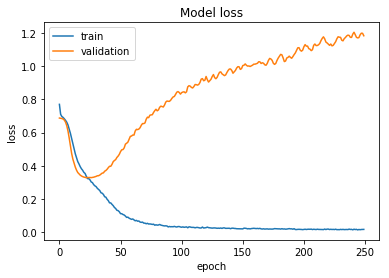

In [71]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

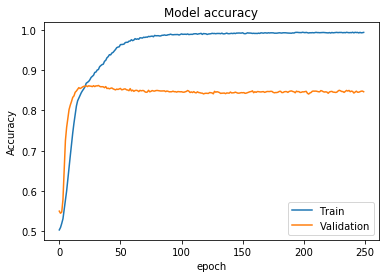

In [74]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Let's decrease our batch size to 500

In [73]:
model3 = higher_dropout_model()

hist_3 =model3.fit(x_train,y_train,epochs=250, batch_size=500, verbose=0,validation_split=0.2)

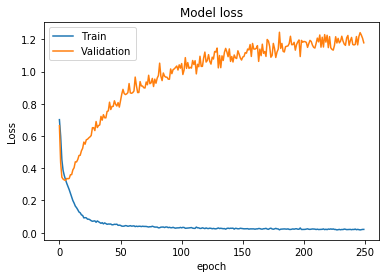

In [76]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

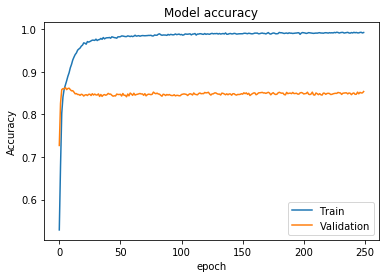

In [77]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Let's find the optimal number of epochs for the first model

In [79]:
hist_1.history['val_acc'].index(max(hist_1.history['val_acc']))

13

In [82]:
final_model = baseline_model()
final_model.fit(x_train,y_train,epochs=13, batch_size=5000, verbose=2)

Epoch 1/13
 - 1s - loss: 0.6782 - acc: 0.5652
Epoch 2/13
 - 1s - loss: 0.5957 - acc: 0.6974
Epoch 3/13
 - 1s - loss: 0.4992 - acc: 0.7666
Epoch 4/13
 - 1s - loss: 0.4354 - acc: 0.8078
Epoch 5/13
 - 1s - loss: 0.3897 - acc: 0.8333
Epoch 6/13
 - 1s - loss: 0.3602 - acc: 0.8485
Epoch 7/13
 - 1s - loss: 0.3429 - acc: 0.8567
Epoch 8/13
 - 1s - loss: 0.3239 - acc: 0.8646
Epoch 9/13
 - 1s - loss: 0.3105 - acc: 0.8706
Epoch 10/13
 - 1s - loss: 0.3011 - acc: 0.8751
Epoch 11/13
 - 1s - loss: 0.2892 - acc: 0.8816
Epoch 12/13
 - 1s - loss: 0.2794 - acc: 0.8857
Epoch 13/13
 - 1s - loss: 0.2690 - acc: 0.8925


## Evaluating the model
Lastly we can evaluate this model on the test set just to double check that the model is still performing

In [83]:
score = final_model.evaluate(x_test, y_test, verbose=0,)
print("Accuracy: ", score[1])

Accuracy:  0.85592
